In [2]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')  #gives white background for visualization
%matplotlib inline

In [4]:
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

In [5]:
from datetime import datetime

In [6]:
pd.core.common.is_list_like = pd.api.types.is_list_like

In [7]:
import pandas_datareader as web

In [8]:
import pandas_datareader as DataReader

In [9]:
end = datetime.now()

start = datetime(end.year-1, end.month, end.day)

In [10]:
for stock in tech_list:
    globals()[stock] = web.DataReader(stock, 'iex', start, end) #setting tech_list name as dataframes (AAPL, GOOG etc..)

Now, we have four dataframes with the use of Globals() i.e. AAPL, GOOG, MSFT, AMZN

In [11]:
AAPL.head()

,open,high,low,close,volume
date,,,,,
2017-08-14,156.9469,157.8236,156.3854,157.4690,22122734
2017-08-15,158.2669,159.7791,157.7547,159.1929,29465487
2017-08-16,159.5279,160.0894,157.7645,158.5526,27671612
2017-08-17,158.1290,158.3162,155.4889,155.5086,27940565
2017-08-18,155.5086,157.1242,154.3856,155.1540,27428069


In [12]:
GOOG.head()

,open,high,low,close,volume
date,,,,,
2017-08-14,922.53,924.6680,918.1900,922.67,1064530
2017-08-15,924.23,926.5499,919.8200,922.22,883369
2017-08-16,925.29,932.7000,923.4450,926.96,1006711
2017-08-17,925.78,926.8600,910.9800,910.98,1277238
2017-08-18,910.31,915.2750,907.1543,910.67,1342689


In [13]:
AAPL.describe()

,open,high,low,close,volume
count,252.000000,252.000000,252.000000,252.000000,2.520000e+02
mean,172.576303,173.974696,171.269804,172.668222,2.974027e+07
std,13.362958,13.424069,13.462275,13.509539,1.261871e+07
min,147.755900,149.568500,146.938200,148.307500,1.251979e+07
25%,161.750525,164.439475,160.947400,162.275500,2.100963e+07
50%,171.439500,172.864800,170.447650,171.534700,2.623920e+07
75%,183.991225,185.788400,182.831225,184.321025,3.501054e+07
max,208.588400,210.952000,207.700000,208.870000,8.659382e+07


In [14]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
Index: 252 entries, 2017-08-14 to 2018-08-13
Data columns (total 5 columns):
open      252 non-null float64
high      252 non-null float64
low       252 non-null float64
close     252 non-null float64
volume    252 non-null int64
dtypes: float64(4), int64(1)
memory usage: 11.8+ KB


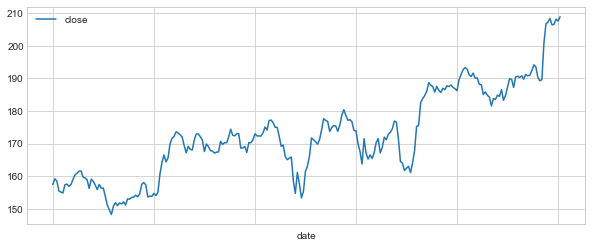

In [15]:
AAPL['close'].plot(use_index = True, legend=True, figsize=(10,4))

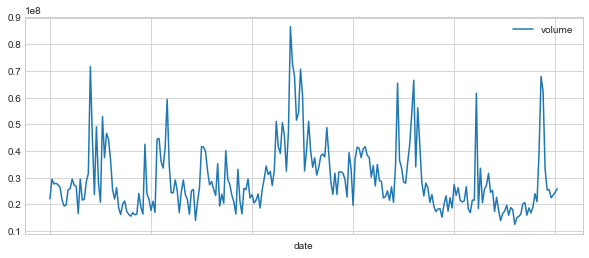

In [16]:
AAPL['volume'].plot(legend=True, figsize = (10,4) )

In [17]:
import seaborn as sns

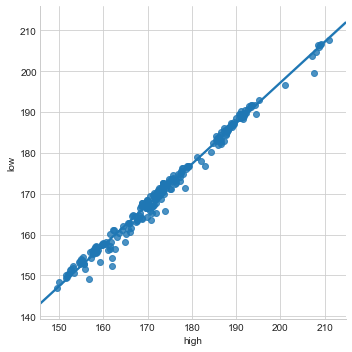

In [18]:
sns.lmplot('high', 'low', data = AAPL)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1338dba8>,
      dtype=object)

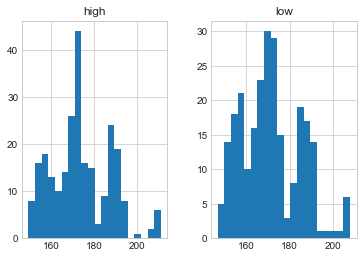

In [19]:
AAPL.hist(column= ['high', 'low'], bins=20)

In [20]:
ma_day = [10, 20, 50]

for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    
    AAPL[column_name] = AAPL['close'].rolling(ma).mean()

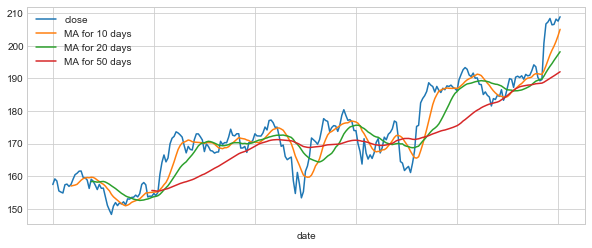

In [21]:
AAPL[['close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(subplots = False, figsize = (10,4))

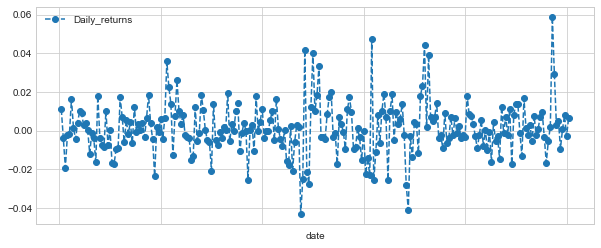

In [22]:
AAPL['Daily_returns'] = AAPL['close'].pct_change()

AAPL['Daily_returns'].plot(figsize = (10,4), legend= True, linestyle = '--' , marker = 'o')

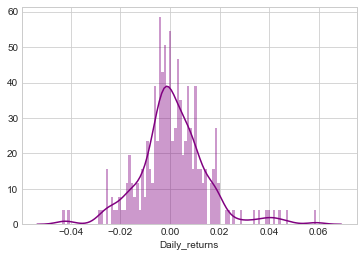

In [23]:
sns.distplot(AAPL['Daily_returns'].dropna(),bins = 100, color = 'purple')  #put two plots on top of each other using distantplot 
                                                                            #here histogram and kde plots

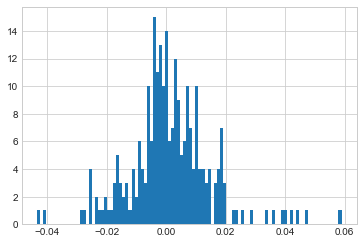

In [24]:
AAPL['Daily_returns'].hist(bins=100)

In [25]:
stocks = pd.DataFrame({"AAPL": AAPL["close"],   #I have created a new dataframe, consisting of only close values from
                       "GOOG": GOOG["close"],   #all the dataframes (AAPL, GOOG, MSFT, AMZN) 
                      "MSFT": MSFT["close"],    #using dictionary and passing the close column from every dataframe.
                       "AMZN": AMZN["close"]
                      })

In [26]:
stocks.head()   #stocks = closing values 

,AAPL,AMZN,GOOG,MSFT
date,,,,
2017-08-14,157.4690,983.30,922.67,72.1808
2017-08-15,159.1929,982.74,922.22,72.2006
2017-08-16,158.5526,978.18,926.96,72.6246
2017-08-17,155.5086,960.57,910.98,71.3920
2017-08-18,155.1540,958.47,910.67,71.4807


In [27]:
tech_rets = stocks.pct_change()    #tech_rets are the daily returns value

In [28]:
tech_rets.head()

,AAPL,AMZN,GOOG,MSFT
date,,,,
2017-08-14,NaN,NaN,NaN,NaN
2017-08-15,0.010948,-0.000570,-0.000488,0.000274
2017-08-16,-0.004022,-0.004640,0.005140,0.005873
2017-08-17,-0.019199,-0.018003,-0.017239,-0.016972
2017-08-18,-0.002280,-0.002186,-0.000340,0.001242


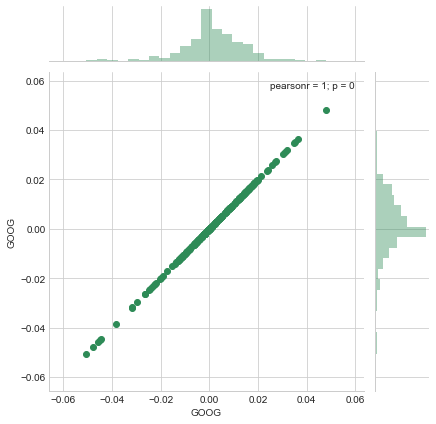

In [29]:
sns.jointplot('GOOG', 'GOOG', data = tech_rets, kind = 'scatter', color = 'seagreen')

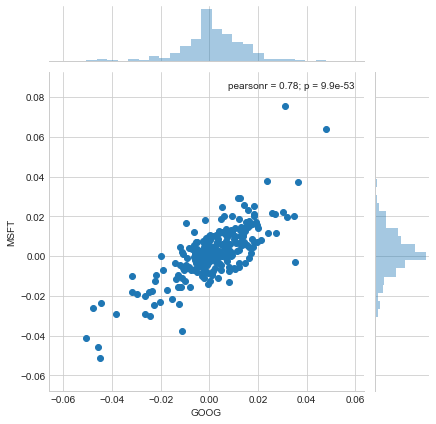

In [30]:
sns.jointplot('GOOG', 'MSFT', data = tech_rets, kind = 'scatter')

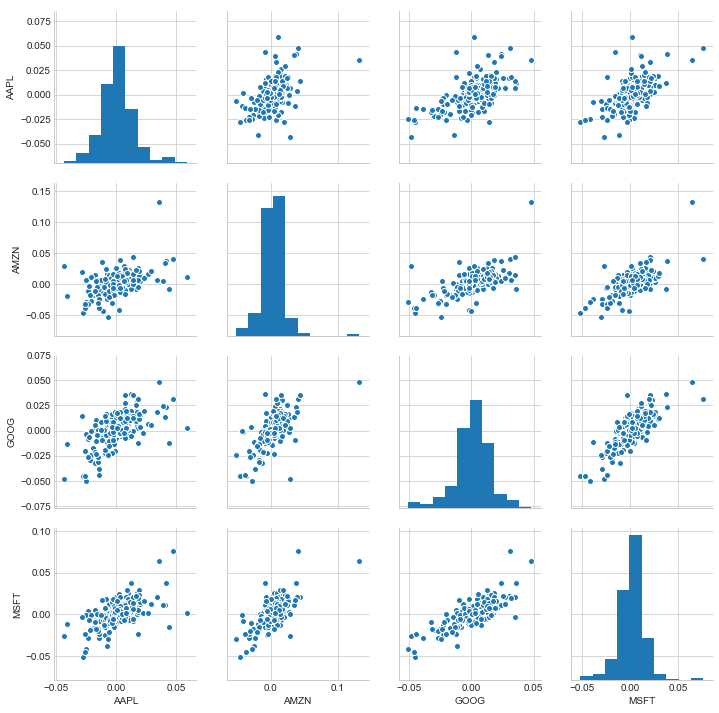

In [31]:
sns.pairplot(tech_rets.dropna())

/anaconda3/lib/python3.5/site-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
/anaconda3/lib/python3.5/site-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
/anaconda3/lib/python3.5/site-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
/anaconda3/lib/python3.5/site-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
/anaconda3/lib/python3.5/site-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
/anaconda3/lib/python3.5/site-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)


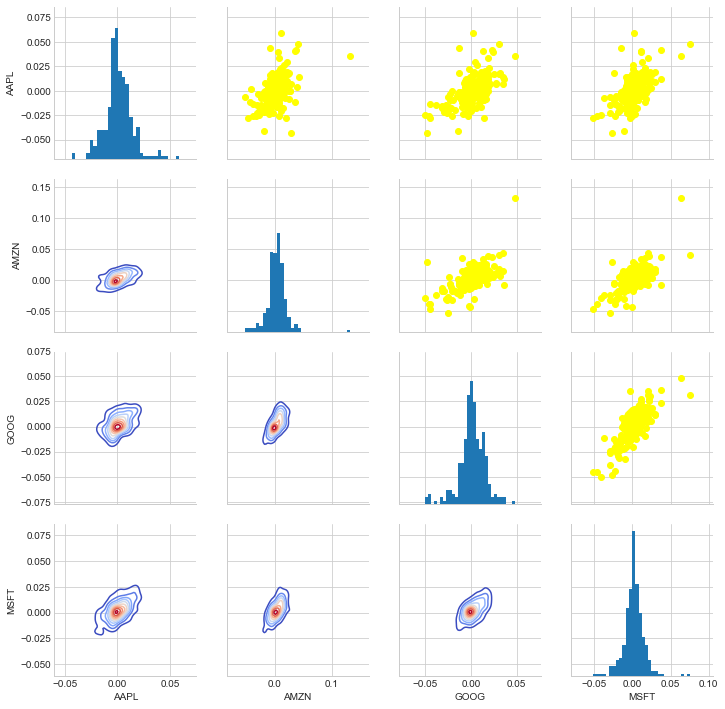

In [32]:
returns_fig = sns.PairGrid(tech_rets.dropna())           #pairgrid for comapring dataframes 

returns_fig.map_upper(plt.scatter, color = 'yellow')

returns_fig.map_lower(sns.kdeplot, cmap = 'coolwarm')

returns_fig.map_diag(plt.hist, bins = 30, density = 0.5)


/anaconda3/lib/python3.5/site-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
/anaconda3/lib/python3.5/site-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
/anaconda3/lib/python3.5/site-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
/anaconda3/lib/python3.5/site-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
/anaconda3/lib/python3.5/site-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
/anaconda3/lib/python3.5/site-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)


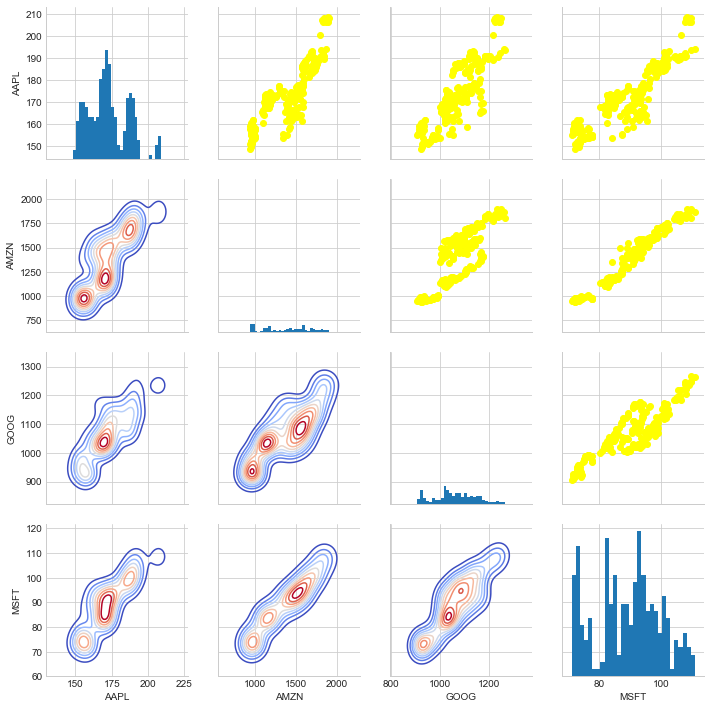

In [33]:
returns_fig = sns.PairGrid(stocks.dropna())

returns_fig.map_upper(plt.scatter, color = 'yellow')

returns_fig.map_lower(sns.kdeplot, cmap = 'coolwarm')

returns_fig.map_diag(plt.hist, bins = 30, density = 0.5)

Risk Analysis


In [34]:
rets = tech_rets.dropna()

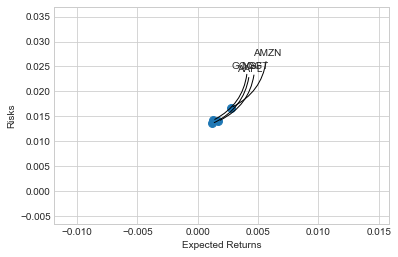

In [35]:
area = np.pi *20

plt.scatter(rets.mean(), rets.std(), s = area)

plt.xlabel('Expected Returns')
plt.ylabel('Risks')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
    label,
    xy = (x,y), xytext = (50,50),
    textcoords = 'offset points', ha = 'right', va = 'bottom',
    arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.3') )     #this is a scatterplot by today's date
                                                                                #if I run this after a month I will get a different 
                                                                                #scatterplot, bacause of datetime.now() function
                                                                                #it considers today's date

In [36]:
AAPL.head()

,open,high,low,close,volume,MA for 10 days,MA for 20 days,MA for 50 days,Daily_returns
date,,,,,,,,,
2017-08-14,156.9469,157.8236,156.3854,157.4690,22122734,NaN,NaN,NaN,NaN
2017-08-15,158.2669,159.7791,157.7547,159.1929,29465487,NaN,NaN,NaN,0.010948
2017-08-16,159.5279,160.0894,157.7645,158.5526,27671612,NaN,NaN,NaN,-0.004022
2017-08-17,158.1290,158.3162,155.4889,155.5086,27940565,NaN,NaN,NaN,-0.019199
2017-08-18,155.5086,157.1242,154.3856,155.1540,27428069,NaN,NaN,NaN,-0.002280


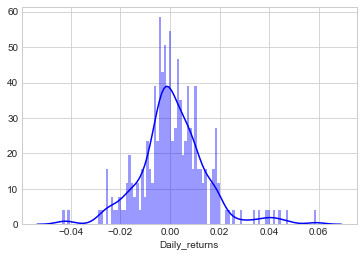

In [37]:
sns.distplot(AAPL['Daily_returns'].dropna(), bins=100, color = 'blue')

In [38]:
rets.head()

,AAPL,AMZN,GOOG,MSFT
date,,,,
2017-08-15,0.010948,-0.000570,-0.000488,0.000274
2017-08-16,-0.004022,-0.004640,0.005140,0.005873
2017-08-17,-0.019199,-0.018003,-0.017239,-0.016972
2017-08-18,-0.002280,-0.002186,-0.000340,0.001242
2017-08-21,-0.001841,-0.005404,-0.004403,-0.004689


In [39]:
rets.head()

,AAPL,AMZN,GOOG,MSFT
date,,,,
2017-08-15,0.010948,-0.000570,-0.000488,0.000274
2017-08-16,-0.004022,-0.004640,0.005140,0.005873
2017-08-17,-0.019199,-0.018003,-0.017239,-0.016972
2017-08-18,-0.002280,-0.002186,-0.000340,0.001242
2017-08-21,-0.001841,-0.005404,-0.004403,-0.004689


In [40]:
rets['AAPL'].quantile(0.05)

-0.020720678399972048